# Домашнее задание 2. Нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
import torchvision.transforms as transforms

import time
from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F
from sklearn.preprocessing import PolynomialFeatures

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [ ]:
data_fish = pd.read_csv('/content/Fish.csv')
data_fish.rename(columns={'Weight':'target'}, inplace=True)

poly = PolynomialFeatures(2)
X = data_fish[['Height','Width','Length1','Length2','Length3']].to_numpy(dtype='float32')
y = data_fish['target'].to_numpy(dtype='float32')

scaler = StandardScaler()
X = scaler.fit_transform(X)

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

X = poly.fit_transform(X)
X = torch.from_numpy(X).to(DEVICE)
y = torch.from_numpy(np.array([y])).t().to(DEVICE)

print(X.size())
print(X.dtype)
print(X.device)

print(y.size())
print(y.dtype)
print(y.device)

torch.Size([159, 21])
torch.float32
cuda:0
torch.Size([159, 1])
torch.float32
cuda:0


In [ ]:
from torch.utils.data import DataLoader

dataset = TensorDataset(X,y)

batch_size = 20
train_dl = DataLoader(dataset, batch_size, shuffle=True)

train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(val_set, batch_size=64, shuffle=True)

## 1.2 По необходимости проведите преодбработку/нормализацию данных

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [ ]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):

    def __init__(self, num_features, num_hidden, activation):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x.float())
        return out

configurations = [[40],[40,50],[30,40,50],[30,40,50,30]]
activation_funcs = {
    'Sigmoid':nn.Sigmoid,
    'ReLU':nn.ReLU,
    'ELU':nn.ELU,
    'Tanh':nn.Tanh
    }

optimizators = ['SGD','Adam','RMSprop','SGD_momentum']

results = {}
results_train = {}

for opt in optimizators:
  results[opt]={}
  results_train[opt]={}
  for func in activation_funcs:
    results[opt][func]=[]
    results_train[opt][func]=[]
    for conf in configurations:
      model = MLP(num_features=21, # Количество фич после поиска полиномиальных
                  num_hidden=conf,
                  activation=activation_funcs[func]) # 2 внутренних слоя:
      model.cuda()

      if opt == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
      elif opt == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
      elif opt == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-5)
      elif opt == 'SGD_momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)


      start_time = time.time()
      minibatch_cost = []
      epoch_cost = []

      for epoch in range(NUM_EPOCHS):
          model.train()
          for features, targets in train_dataloader:
              #features = features.to(DEVICE)
              #targets = targets.to(DEVICE)

              optimizer.zero_grad()
              out = model(features)
              cost = F.mse_loss(out.float(), targets.float())
              
              cost.backward()
              optimizer.step()
      
      val_X, val_Y = val_set[:]
      rmse = torch.sqrt(F.mse_loss(model(val_X), val_Y)).item()
      results[opt][func].append((len(conf),rmse))

      train_X, train_Y = train_set[:]
      rmse = torch.sqrt(F.mse_loss(model(train_X), train_Y)).item()
      results_train[opt][func].append((len(conf),rmse))
      #print(f"model {conf}, RMSE: ", rmse)

In [ ]:
# Тестовая выборка
results

{'Adam': {'ELU': [(1, 534.6309204101562),
   (2, 534.8858032226562),
   (3, 534.8117065429688),
   (4, 534.6873779296875)],
  'ReLU': [(1, 534.6613159179688),
   (2, 534.5923461914062),
   (3, 534.6498413085938),
   (4, 534.64697265625)],
  'Sigmoid': [(1, 534.4287109375),
   (2, 534.7637329101562),
   (3, 534.6973876953125),
   (4, 534.6494750976562)],
  'Tanh': [(1, 534.5800170898438),
   (2, 534.6405639648438),
   (3, 534.6123046875),
   (4, 534.7875366210938)]},
 'RMSprop': {'ELU': [(1, 535.0285034179688),
   (2, 534.766845703125),
   (3, 534.5783081054688),
   (4, 534.8425903320312)],
  'ReLU': [(1, 534.770751953125),
   (2, 534.69873046875),
   (3, 534.71875),
   (4, 534.8883666992188)],
  'Sigmoid': [(1, 534.822021484375),
   (2, 534.667724609375),
   (3, 534.8294677734375),
   (4, 534.6219482421875)],
  'Tanh': [(1, 534.671142578125),
   (2, 534.8370971679688),
   (3, 534.8087768554688),
   (4, 534.6956787109375)]},
 'SGD': {'ELU': [(1, 156.4073944091797),
   (2, 58.12611389160

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

#### Валидационные данные

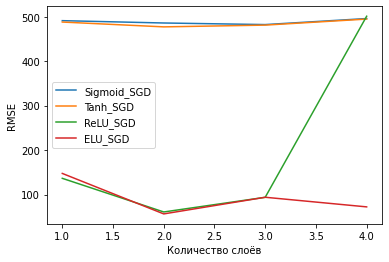

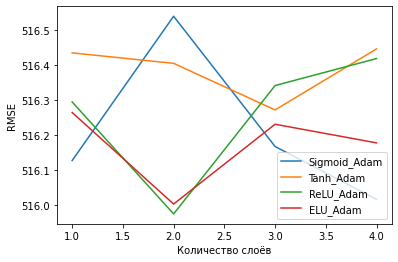

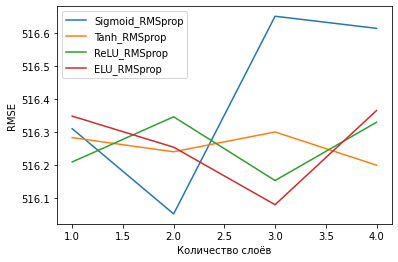

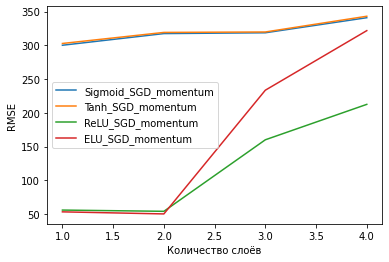

In [ ]:
import matplotlib.pyplot as plt

funcs = ['Sigmoid','Tanh','ReLU','ELU']

for opt in results:
  plt.ylabel('RMSE')
  plt.xlabel('Количество слоёв')
  for func in funcs:
    ar = np.array(results[opt][func])
    x = ar[:,0]
    y = ar[:,1]
    plt.plot(x,y, label=func+'_'+opt)
  plt.legend()
  plt.show()

#### Train данные

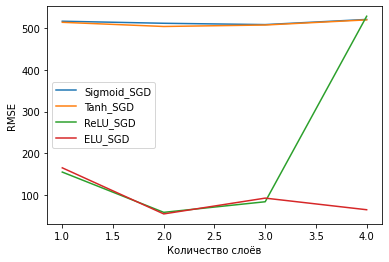

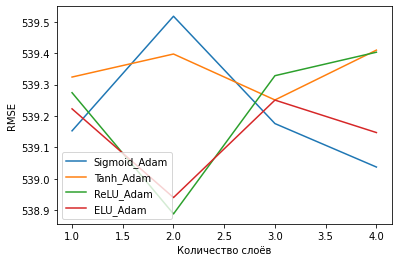

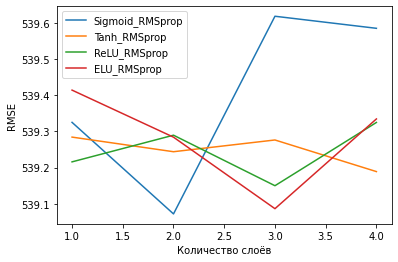

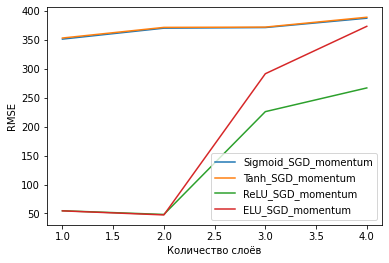

In [ ]:
import matplotlib.pyplot as plt

funcs = ['Sigmoid','Tanh','ReLU','ELU']

for opt in results:
  plt.ylabel('RMSE')
  plt.xlabel('Количество слоёв')
  for func in funcs:
    ar = np.array(results_train[opt][func])
    x = ar[:,0]
    y = ar[:,1]
    plt.plot(x,y, label=func+'_'+opt)
  plt.legend()
  plt.show()

Видим, что наилучшая конфигурация - ReLU + SGD_momentum. Даёт 50.42 RMSE на двух слоях.

#### Accuracy нельзя построить для задачи регрессии.
Accuracy можно построить только для задачи классификации (или сегментации).

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

### Валидационные данные

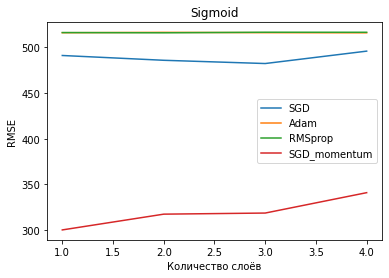

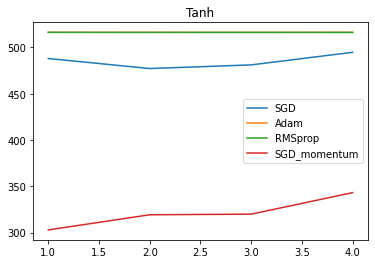

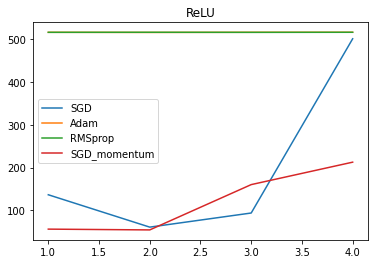

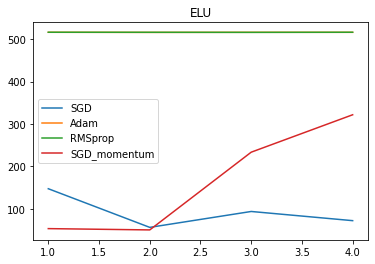

In [ ]:
import matplotlib.pyplot as plt

funcs = ['Sigmoid','Tanh','ReLU','ELU']

plt.ylabel('RMSE')
plt.xlabel('Количество слоёв')
for func in funcs:
  for opt in results:
    ar = np.array(results[opt][func])
    x = ar[:,0]
    y = ar[:,1]
    plt.plot(x,y, label=opt)
  plt.title(func)
  plt.legend()
  plt.show()

In [ ]:
# Видим, что во всех функциях активации лидирует SGD_momentum

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [ ]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

BATCH_SIZE = 100
NUM_EPOCHS = 100
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):

    def __init__(self, num_features, num_hidden, activation, configuration):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            if 'bn' in configuration:
              self.layers.append(nn.BatchNorm1d(layers[i]))
            if 'dp02' in configuration:
              self.layers.append(nn.Dropout(0.2))
            if 'dp05' in configuration:
              self.layers.append(nn.Dropout(0.5))

            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x.float())
        return out

# Мы берём SGD with momentum, Tanh и 2 слоя, т.к. они показали наилучшие результаты

configurations = {
    'bn':['bn'],
    'dp05':['dp05'],
    'dp02_bn':['dp02', 'bn'],
    'dp05_bn':['bn', 'dp05']
    }
results = {}
results_train = {}

for c in configurations:
  results[c]=[]
  results_train[c]=[]
  model = MLP(num_features=21, # Количество фич после поиска полиномиальных
              num_hidden=[40,50],
              activation=nn.ReLU,
              configuration=c) # 2 внутренних слоя:
  model.cuda()
  optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)

  for epoch in range(NUM_EPOCHS):
      model.train()
      for features, targets in train_dataloader:
        
          optimizer.zero_grad()
          out = model(features)
          cost = F.mse_loss(out.float(), targets.float())
          
          cost.backward()
          optimizer.step()
      
      val_X, val_Y = val_set[:]
      rmse = torch.sqrt(F.mse_loss(model(val_X), val_Y)).item()
      results[c].append(rmse)

      train_X, train_Y = train_set[:]
      rmse = torch.sqrt(F.mse_loss(model(train_X), train_Y)).item()
      results_train[c].append(rmse)

### Валидационные данные

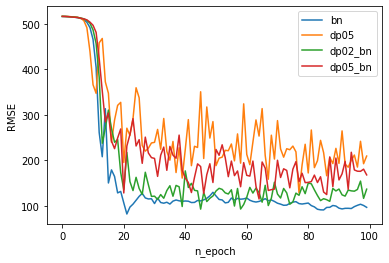

In [ ]:
plt.ylabel('RMSE')
plt.xlabel('n_epoch')
for c in results:
  plt.plot(results[c], label=c)
plt.legend()
plt.show()

### Train данные

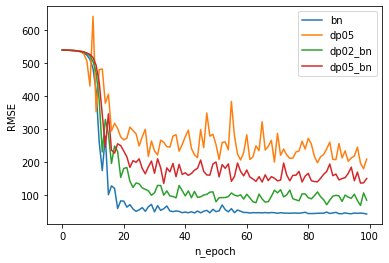

In [ ]:
plt.ylabel('RMSE')
plt.xlabel('n_epoch')
for c in results:
  plt.plot(results_train[c], label=c)
plt.legend()
plt.show()

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

In [ ]:
model = MLP(num_features=21, # Количество фич после поиска полиномиальных
              num_hidden=[40,50],
              activation=nn.ReLU,
              configuration='bn')
model.cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)

for epoch in range(NUM_EPOCHS):
      model.train()
      for features, targets in train_dataloader:
        
          optimizer.zero_grad()
          out = model(features)
          cost = F.mse_loss(out.float(), targets.float())
          
          cost.backward()
          optimizer.step()

## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*

1) GPU сильно ускоряет весь процесс.

2) Наилучшая модель использует SGD + momentum + ReLU + BatchNorm + 2 внутренних слоя.


# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [2]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score

data = pd.read_csv('/content/spam.csv', usecols=['v1','v2'], encoding='latin-1')
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [3]:
from torch.utils.data import DataLoader

data['target'] = (data['target']=='spam')*1

# Удаляем дубликаты в данных 
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

# Создаём новый признак - длина сообщения
data['length'] = data['text'].apply(len)

# Создаём новый признак - количество слов
data['words_count'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Создаём новый признак - количество предложений
data['sentences_count'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Удаляем пунктуацию
data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

if False:
  # Добавляем счётчик слов в качестве признаков
  v = TfidfVectorizer(decode_error='ignore')
  x = v.fit_transform(data['text'])
else:
  v = CountVectorizer()
  x = v.fit_transform(data['text'])

words = pd.DataFrame(x.toarray(), columns=['_'+a for a in v.get_feature_names()])
data = pd.concat([data, words], axis=1)
data.head()

X = data.drop(columns=['target', 'text']).to_numpy(dtype='float32')
y = data['target'].to_numpy(dtype='float32')


DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

X = torch.from_numpy(X).to(DEVICE)
y = torch.from_numpy(np.array([y])).t().to(DEVICE)

dataset = TensorDataset(X,y)

batch_size = 20
train_dl = DataLoader(dataset, batch_size, shuffle=True)

train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(val_set, batch_size=64, shuffle=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [ ]:
BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):

    def __init__(self, num_features, num_hidden, activation):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers.append(nn.Sigmoid())
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x)
        return out

configurations = [[], [4000], [2000], [1000], [400], [1000, 900], [1000, 400, 200]]
activation_funcs = {
    'Sigmoid':nn.Sigmoid
    }

optimizators = ['SGD_momentum']

results = {}
results_train = {}

for opt in optimizators:
  results[opt]={}
  results_train[opt]={}
  for func in activation_funcs:
    results[opt][func]=[]
    results_train[opt][func]=[]
    for conf in configurations:
      model = MLP(num_features=9492, # Количество фич после обработки токенайзером
                  num_hidden=conf,
                  activation=activation_funcs[func]) # 2 внутренних слоя:
      model.cuda()

      criterion = nn.BCELoss()
      
      if opt == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
      elif opt == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
      elif opt == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
      elif opt == 'SGD_momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

      start_time = time.time()
      minibatch_cost = []
      epoch_cost = []

      for epoch in range(NUM_EPOCHS):
          model.train()
          for features, targets in train_dataloader:
              features = features.to(DEVICE)
              targets = targets.to(DEVICE)

              optimizer.zero_grad()
              out = model(features)
              cost = criterion(out, targets)
              
              cost.backward()
              optimizer.step()
      
      val_X, val_Y = val_set[:]
      y_pred = torch.round(model(val_X)).cpu().detach().numpy()
      val_score = f1_score(val_Y.cpu().detach().numpy(), y_pred, average='macro')
      results[opt][func].append((len(conf),val_score))

      train_X, train_Y = train_set[:]
      y_pred = torch.round(model(train_X)).cpu().detach().numpy()
      train_score = f1_score(train_Y.cpu().detach().numpy(), y_pred, average='macro')
      results_train[opt][func].append((len(conf),train_score))

      print(f'conf {conf} is done! val score:{val_score}, train score:{train_score}')

conf [] is done! val score:0.9088137472283815, train score:0.9322572469319821
conf [4000] is done! val score:0.8307860153731714, train score:0.8552620930967423
conf [2000] is done! val score:0.8708556912149726, train score:0.891434401173236
conf [1000] is done! val score:0.5829908641555593, train score:0.5843996911787387
conf [400] is done! val score:0.8806488153114466, train score:0.8919866653095379
conf [1000, 900] is done! val score:0.7191489361702127, train score:0.7318266915131417
conf [1000, 400, 200] is done! val score:0.8285696116573209, train score:0.8426662059618089


## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

In [ ]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score

import random
random.seed(0)
torch.manual_seed(0)

BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):

    def __init__(self, num_features, num_hidden, activation):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers.append(nn.Sigmoid())
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x)
        return out

configurations = [[], [4000], [2000], [1000]]
activation_funcs = {
    'Sigmoid':nn.Sigmoid,
    'ReLU':nn.ReLU,
    'ELU':nn.ELU,
    'Tanh':nn.Tanh
    }

optimizators = ['SGD_momentum']

results = {}
results_train = {}

for opt in optimizators:
  results[opt]={}
  results_train[opt]={}
  for func in activation_funcs:
    results[opt][func]=[]
    results_train[opt][func]=[]
    for conf in configurations:
      model = MLP(num_features=9492, # Количество фич после обработки токенайзером
                  num_hidden=conf,
                  activation=activation_funcs[func]) # 2 внутренних слоя:
      model.cuda()

      criterion = nn.BCELoss()
      
      if opt == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
      elif opt == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
      elif opt == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
      elif opt == 'SGD_momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

      start_time = time.time()
      minibatch_cost = []
      epoch_cost = []

      for epoch in range(NUM_EPOCHS):
          model.train()
          for features, targets in train_dataloader:
              features = features.to(DEVICE)
              targets = targets.to(DEVICE)

              optimizer.zero_grad()
              out = model(features)
              cost = criterion(out, targets)
              
              cost.backward()
              optimizer.step()
      
      val_X, val_Y = val_set[:]
      y_pred = torch.round(model(val_X)).cpu().detach().numpy()
      val_score = f1_score(val_Y.cpu().detach().numpy(), y_pred, average='macro')
      results[opt][func].append((len(conf),val_score))

      train_X, train_Y = train_set[:]
      y_pred = torch.round(model(train_X)).cpu().detach().numpy()
      train_score = f1_score(train_Y.cpu().detach().numpy(), y_pred, average='macro')
      results_train[opt][func].append((len(conf),train_score))

      print(f'conf {conf} ({func}) is done! val score:{val_score}, train score:{train_score}')

conf [] (Sigmoid) is done! val score:0.46810699588477367, train score:0.4658312879472936
conf [4000] (Sigmoid) is done! val score:0.9089988998899889, train score:0.9006695458843372
conf [2000] (Sigmoid) is done! val score:0.8787445005175983, train score:0.8628401469451388
conf [1000] (Sigmoid) is done! val score:0.888095238095238, train score:0.8988596774723452
conf [] (ReLU) is done! val score:0.46810699588477367, train score:0.4658312879472936
conf [4000] (ReLU) is done! val score:0.5443275660554501, train score:0.5398518732501585
conf [2000] (ReLU) is done! val score:0.8488441258607305, train score:0.8491761353866291
conf [1000] (ReLU) is done! val score:0.8509783108496081, train score:0.8539913723951146
conf [] (ELU) is done! val score:0.46810699588477367, train score:0.4658312879472936
conf [4000] (ELU) is done! val score:0.8503046814335162, train score:0.8424695396175185
conf [2000] (ELU) is done! val score:0.8903355813561754, train score:0.8994302024595611
conf [1000] (ELU) is d

In [ ]:
results={
    'SGD_momentum':{
        'Sigmoid':[(0, 0.46810699588477367), (4000, 0.9089988998899889), (2000, 0.8787445005175983), (1000,0.888095238095238)],
        'ReLU':[(0, 0.46810699588477367), (4000, 0.5443275660554501), (2000, 0.848844125860730), (1000, 0.8509783108496081)],
        'ELU':[(0, 0.46810699588477367), (4000, 0.8503046814335162), (2000, 0.8903355813561754), (1000, 0.9344817285671612)],
        'Tanh':[(0, 0.46810699588477367), (4000, 0.9282322254189663), (2000, 0.8751393136760004), (1000, 0.8165690970374313)]
    }
}

results_train={
    'SGD_momentum':{
        'Sigmoid':[(0, 0.4658312879472936), (4000, 0.9006695458843372), (2000, 0.8628401469451388), (1000,0.8988596774723452)],
        'ReLU':[(0, 0.4658312879472936), (4000, 0.5398518732501585), (2000, 0.8491761353866291), (1000, 0.8539913723951146)],
        'ELU':[(0, 0.4658312879472936), (4000, 0.8424695396175185), (2000, 0.8994302024595611), (1000, 0.9194015485756102)],
        'Tanh':[(0, 0.4658312879472936), (4000, 0.9149331860350534), (2000, 0.8556230594858242), (1000, 0.8337147159981277)]
    }
}

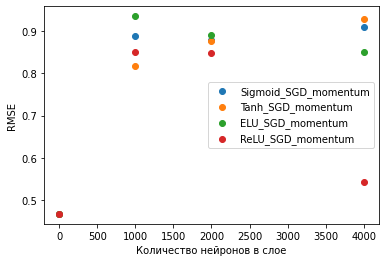

In [ ]:
import matplotlib.pyplot as plt

funcs = ['Sigmoid','Tanh','ELU','ReLU']

for opt in results:
  plt.ylabel('RMSE')
  plt.xlabel('Количество нейронов в слое')
  for func in funcs:
    ar = np.array(results[opt][func])
    x = ar[:,0]
    y = ar[:,1]
    plt.scatter(x,y, label=func+'_'+opt)
  plt.legend()
  plt.show()

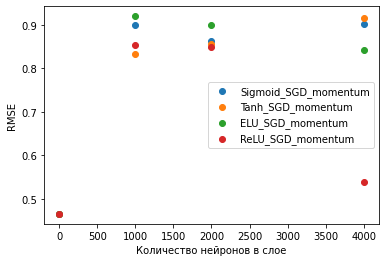

In [ ]:
import matplotlib.pyplot as plt

funcs = ['Sigmoid','Tanh','ELU','ReLU']

for opt in results:
  plt.ylabel('RMSE')
  plt.xlabel('Количество нейронов в слое')
  for func in funcs:
    ar = np.array(results_train[opt][func])
    x = ar[:,0]
    y = ar[:,1]
    plt.scatter(x,y, label=func+'_'+opt)
  plt.legend()
  plt.show()

Видим, что в обоих случаях Лидируют Tanh[4000] и ELU[1000] с небольшим перевесом в сторону ELU[1000].

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

In [ ]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score

import random
random.seed(0)
torch.manual_seed(0)

BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):

    def __init__(self, num_features, num_hidden, activation):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers.append(nn.Sigmoid())
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x)
        return out


configurations = [[1000]]
activation_funcs = {
    'ELU':nn.ELU
    }

optimizators = ['SGD','Adam','RMSprop','SGD_momentum']

results = {}
results_train = {}
results_accuracy = {}
results_train_accuracy = {}

for opt in optimizators:
  results[opt]={}
  results_train[opt]={}
  results_accuracy[opt]={}
  results_train_accuracy[opt]={}
  for func in activation_funcs:
    results[opt][func]=[]
    results_train[opt][func]=[]
    results_accuracy[opt][func]=[]
    results_train_accuracy[opt][func]=[]
    for conf in configurations:
      model = MLP(num_features=9492, # Количество фич после обработки токенайзером
                  num_hidden=conf,
                  activation=activation_funcs[func]) # 2 внутренних слоя:
      model.cuda()

      criterion = nn.BCELoss()
      
      if opt == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
      elif opt == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
      elif opt == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
      elif opt == 'SGD_momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

      start_time = time.time()
      minibatch_cost = []
      epoch_cost = []

      for epoch in range(NUM_EPOCHS):
          model.train()
          for features, targets in train_dataloader:
              features = features.to(DEVICE)
              targets = targets.to(DEVICE)

              optimizer.zero_grad()
              out = model(features)
              cost = criterion(out, targets)
              
              cost.backward()
              optimizer.step()
      
      val_X, val_Y = val_set[:]
      y_pred = torch.round(model(val_X)).cpu().detach().numpy()
      val_score = f1_score(val_Y.cpu().detach().numpy(), y_pred, average='macro')
      results[opt][func].append((conf[0], val_score))
      
      val_score = accuracy_score(val_Y.cpu().detach().numpy(), y_pred)
      results_accuracy[opt][func].append((conf[0], val_score))

      train_X, train_Y = train_set[:]
      y_pred = torch.round(model(train_X)).cpu().detach().numpy()
      train_score = f1_score(train_Y.cpu().detach().numpy(), y_pred, average='macro')
      results_train[opt][func].append((conf[0], train_score))

      train_score = accuracy_score(train_Y.cpu().detach().numpy(), y_pred)
      results_train_accuracy[opt][func].append((conf[0], train_score))

In [ ]:
results

{'Adam': {'ELU': [(1000, 0.955699870342184)]},
 'RMSprop': {'ELU': [(1000, 0.9532012346908294)]},
 'SGD': {'ELU': [(1000, 0.49583836940995485)]},
 'SGD_momentum': {'ELU': [(1000, 0.8867565830665942)]}}

In [ ]:
for opt in results:
  results[opt] = results[opt]['ELU'][0][1]

for opt in results_train:
  results_train[opt] = results_train[opt]['ELU'][0][1]

for opt in results_accuracy:
  results_accuracy[opt] = results_accuracy[opt]['ELU'][0][1]

for opt in results_train_accuracy:
  results_train_accuracy[opt] = results_train_accuracy[opt]['ELU'][0][1]

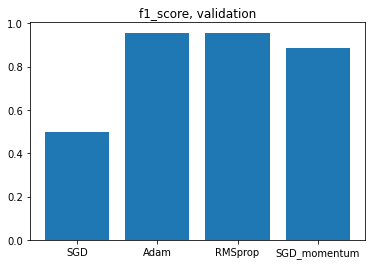

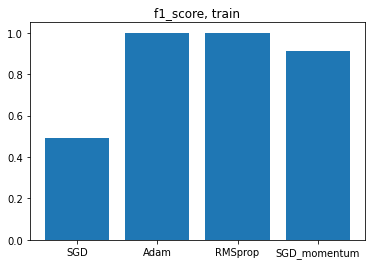

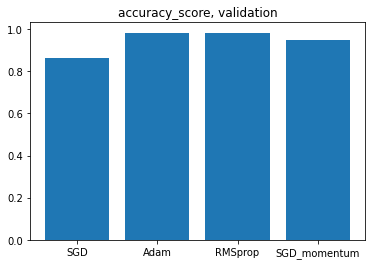

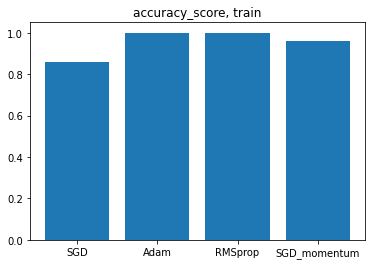

In [42]:
titles = ['f1_score, validation','f1_score, train', 'accuracy_score, validation', 'accuracy_score, train']
data = [results, results_train, results_accuracy, results_train_accuracy]

for t, d in zip(titles, data):
  plt.title(t)
  plt.bar(range(len(d)), list(d.values()))
  plt.xticks(range(len(d)), d.keys())
  plt.show()

Наилучшие результаты показывает Adam с f1_score = 0.956 и accuracy = 0.98

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [9]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score

BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):
    def __init__(self, num_features, num_hidden, activation, configuration):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            if 'bn' in configuration:
              self.layers.append(nn.BatchNorm1d(layers[i]))
            if 'dp02' in configuration:
              self.layers.append(nn.Dropout(0.2))
            if 'dp05' in configuration:
              self.layers.append(nn.Dropout(0.5))

            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers.append(nn.Sigmoid())
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x)
        return out

configurations = {
    'bn':['bn'],
    'dp05':['dp05'],
    'dp02_bn':['dp02', 'bn'],
    'dp05_bn':['bn', 'dp05']
    }
results = {}
results_train = {}
results_accuracy = {}
results_train_accuracy = {}

for c in configurations:
  results[c]=[]
  results_train[c]=[]
  results_accuracy[c]=[]
  results_train_accuracy[c]=[]

  model = MLP(num_features=9492,
              num_hidden=[1000],
              activation=nn.ELU,
              configuration=c)
  model.cuda()

  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

  for epoch in range(NUM_EPOCHS):
      model.train()
      for features, targets in train_dataloader:
          features = features.to(DEVICE)
          targets = targets.to(DEVICE)

          optimizer.zero_grad()
          out = model(features)
          cost = criterion(out, targets)
          
          cost.backward()
          optimizer.step()
      
  val_X, val_Y = val_set[:]
  y_pred = torch.round(model(val_X)).cpu().detach().numpy()
  val_score = f1_score(val_Y.cpu().detach().numpy(), y_pred, average='macro')
  results[c].append(val_score)
  
  val_score_ac = accuracy_score(val_Y.cpu().detach().numpy(), y_pred)
  results_accuracy[c].append(val_score_ac)
  
  train_X, train_Y = train_set[:]
  y_pred = torch.round(model(train_X)).cpu().detach().numpy()
  train_score = f1_score(train_Y.cpu().detach().numpy(), y_pred, average='macro')
  results_train[c].append(train_score)

  train_score_ac = accuracy_score(train_Y.cpu().detach().numpy(), y_pred)
  results_train_accuracy[c].append(train_score_ac)

  print(f'conf {c} is done! val score: {val_score}, train score:{train_score}')

conf bn is done! val score: 0.8103393006220998, train score:0.9738262513773659
conf dp05 is done! val score: 0.9597877981657672, train score:0.9923388471400834
conf dp02_bn is done! val score: 0.8319231085188532, train score:0.8811153468698669
conf dp05_bn is done! val score: 0.796777789952813, train score:0.9057920598413589


In [11]:
for opt in results:
  results[opt] = results[opt][0]

for opt in results_train:
  results_train[opt] = results_train[opt][0]

for opt in results_accuracy:
  results_accuracy[opt] = results_accuracy[opt][0]

for opt in results_train_accuracy:
  results_train_accuracy[opt] = results_train_accuracy[opt][0]

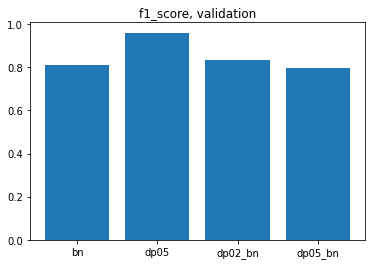

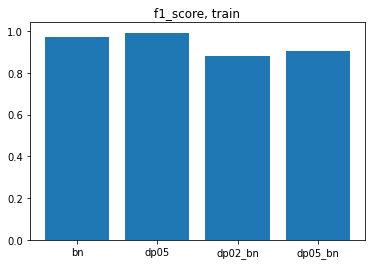

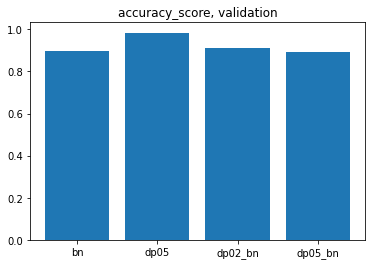

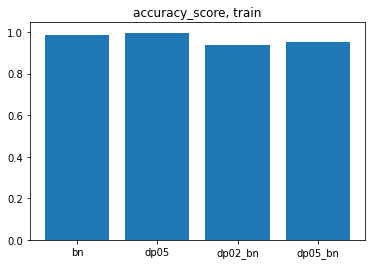

In [12]:
titles = ['f1_score, validation','f1_score, train', 'accuracy_score, validation', 'accuracy_score, train']
data = [results, results_train, results_accuracy, results_train_accuracy]

for t, d in zip(titles, data):
  plt.title(t)
  plt.bar(range(len(d)), list(d.values()))
  plt.xticks(range(len(d)), d.keys())
  plt.show()

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

In [20]:
import time
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score

BATCH_SIZE = 100
NUM_EPOCHS = 100

class MLP(nn.Module):
    def __init__(self, num_features, num_hidden, activation, configuration):
        super().__init__()

        layers = [num_features]
        layers.extend(num_hidden)

        self.layers = nn.ModuleList()
        for i in range(len(layers)-1):
            if 'bn' in configuration:
              self.layers.append(nn.BatchNorm1d(layers[i]))
            if 'dp02' in configuration:
              self.layers.append(nn.Dropout(0.2))
            if 'dp05' in configuration:
              self.layers.append(nn.Dropout(0.5))

            self.layers.append(nn.Linear(layers[i], layers[i+1]))
            self.layers.append(activation())

        self.layers.append(nn.Linear(layers[-1], 1))
        self.layers.append(nn.Sigmoid())
        self.layers = nn.Sequential(*self.layers)
        
    def forward(self, x):
        out = self.layers(x)
        return out

results = []
results_train = []
results_accuracy = []
results_train_accuracy = []

model = MLP(num_features=9492,
            num_hidden=[1000],
            activation=nn.ELU,
            configuration=['dp05'])
model.cuda()

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(NUM_EPOCHS):
    model.train()
    for features, targets in train_dataloader:
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)

        optimizer.zero_grad()
        out = model(features)
        cost = criterion(out, targets)
        
        cost.backward()
        optimizer.step()
    
    val_X, val_Y = val_set[:]
    y_pred = torch.round(model(val_X)).cpu().detach().numpy()
    val_score = f1_score(val_Y.cpu().detach().numpy(), y_pred, average='macro')
    results.append(val_score)

    val_score_ac = accuracy_score(val_Y.cpu().detach().numpy(), y_pred)
    results_accuracy.append(val_score_ac)

    train_X, train_Y = train_set[:]
    y_pred = torch.round(model(train_X)).cpu().detach().numpy()
    train_score = f1_score(train_Y.cpu().detach().numpy(), y_pred, average='macro')
    results_train.append(train_score)

    train_score_ac = accuracy_score(train_Y.cpu().detach().numpy(), y_pred)
    results_train_accuracy.append(train_score_ac)

In [21]:
results[-1], results_accuracy[-1]

(0.950326103616536, 0.9796905222437138)

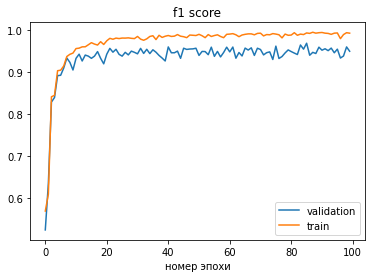

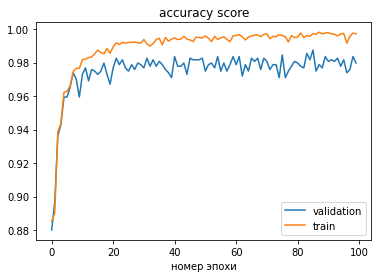

In [22]:
plt.plot(results, label="validation")
plt.plot(results_train, label="train")
plt.xlabel("номер эпохи")
plt.title("f1 score")
plt.legend()
plt.show()

plt.plot(results_accuracy, label="validation")
plt.plot(results_train_accuracy, label="train")
plt.xlabel("номер эпохи")
plt.title("accuracy score")
plt.legend()
plt.show()

## 2.8 Выводы

*Your beautiful thoughts:*

Наилучшую конфигурацию показал ELU + 1 внутренний слой на 1000 нейронов + dropout05 (очень маленький прирост) + Adam.

Модель показала f1_score = 0.9503, accuracy_score = 0.9796 на валидационных данных.